In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from bs4 import BeautifulSoup
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Book_Datasetcsv.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the few books I couldn't read a 100 pag...,Negative
1,I initially bought the official K2 leather cov...,Negative
2,"I love On the Edge! Meeting Brett, Leo and Lis...",Positive
3,A friend (who is no longer a friend) recommend...,Negative
4,At times it was funny and sweet. Other times i...,Negative


In [ ]:
df.shape

(359, 2)

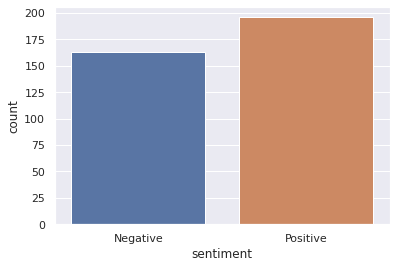

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="sentiment", data=df)

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['clean_review']  = df['review'].str.lower()

In [ ]:
df.head()

,review,sentiment,clean_review
0,One of the few books I couldn't read a 100 pag...,Negative,one of the few books i couldn't read a 100 pag...
1,I initially bought the official K2 leather cov...,Negative,i initially bought the official k2 leather cov...
2,"I love On the Edge! Meeting Brett, Leo and Lis...",Positive,"i love on the edge! meeting brett, leo and lis..."
3,A friend (who is no longer a friend) recommend...,Negative,a friend (who is no longer a friend) recommend...
4,At times it was funny and sweet. Other times i...,Negative,at times it was funny and sweet. other times i...


In [ ]:
df[df['clean_review'].str.contains('@')].head()

,review,sentiment,clean_review


In [ ]:
df[df['clean_review'].str.contains('#')].head()

,review,sentiment,clean_review
240,I'll start by saying this is the first of four...,Positive,i'll start by saying this is the first of four...
245,I got this because I like collaborated short s...,Positive,i got this because i like collaborated short s...
275,Now this is an AWESOMEE thriller!! You will be...,Positive,now this is an awesomee thriller!! you will be...
285,I am not a fan of the Bound Hearts series..so ...,Negative,i am not a fan of the bound hearts series..so ...
289,The first book in The Watchers series is an in...,Positive,the first book in the watchers series is an in...


In [ ]:
df[df['clean_review'].str.contains('http')].head()

,review,sentiment,clean_review


In [ ]:
def remove_URLs(text):
    return re.sub(r"http\S+", "", text)

df['clean_review'] = df['clean_review'].apply(remove_URLs)

In [ ]:
df[df['clean_review'].str.contains('http')]

,review,sentiment,clean_review


In [ ]:
# Remove HTML tags
TAG_RE = re.compile(r'<[^>]+>')
def remove_htmltags(text):
    return TAG_RE.sub('', text)

df['clean_review'] = df['clean_review'].apply(remove_htmltags)

In [ ]:
# Remove Special Characters
def remove_special_characters(text):
    return re.sub('[^ a-zA-Z0-9]', '', text)
    
df['clean_review'] = df['clean_review'].apply(remove_special_characters)

In [ ]:
df.head()

,review,sentiment,clean_review
0,One of the few books I couldn't read a 100 pag...,Negative,one of the few books i couldnt read a 100 page...
1,I initially bought the official K2 leather cov...,Negative,i initially bought the official k2 leather cov...
2,"I love On the Edge! Meeting Brett, Leo and Lis...",Positive,i love on the edge meeting brett leo and lisa ...
3,A friend (who is no longer a friend) recommend...,Negative,a friend who is no longer a friend recommended...
4,At times it was funny and sweet. Other times i...,Negative,at times it was funny and sweet other times it...


In [ ]:
# For words with len 1
single_char = []
count= 0
for i in df.clean_review:
    for j in i.split():
        if len(j)==1 and j.isdigit()==False:
            count+=1
            single_char.append(j)

print('There are total single chracter words remaing in the data: ',count )

There are total single chracter words remaing in the data:  1298


In [ ]:
# Lets Remove these Characters.
# Single characters could also be digits and we make sure that the char should be alphabets.
def remove_single_chars(text):
    clean = []
    for i in text.split():
        if len(i)==1 and i.isalpha()==True:
            pass
        else:
            clean.append(i)
    return ' '.join(clean)

    
df['clean_review'] = df['clean_review'].apply(remove_single_chars)

In [ ]:
df.head()

,review,sentiment,clean_review
0,One of the few books I couldn't read a 100 pag...,Negative,one of the few books couldnt read 100 pages of...
1,I initially bought the official K2 leather cov...,Negative,initially bought the official k2 leather cover...
2,"I love On the Edge! Meeting Brett, Leo and Lis...",Positive,love on the edge meeting brett leo and lisa th...
3,A friend (who is no longer a friend) recommend...,Negative,friend who is no longer friend recommended thi...
4,At times it was funny and sweet. Other times i...,Negative,at times it was funny and sweet other times it...


In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df_positive = df[df.sentiment == 'positive']

In [ ]:
positive_comment_words = ''
for val in df_positive.clean_review:
     
    val = str(val)
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    positive_comment_words += " ".join(tokens)+" "

In [ ]:
df.head()

,review,sentiment,clean_review
0,One of the few books I couldn't read a 100 pag...,Negative,one of the few books couldnt read 100 pages of...
1,I initially bought the official K2 leather cov...,Negative,initially bought the official k2 leather cover...
2,"I love On the Edge! Meeting Brett, Leo and Lis...",Positive,love on the edge meeting brett leo and lisa th...
3,A friend (who is no longer a friend) recommend...,Negative,friend who is no longer friend recommended thi...
4,At times it was funny and sweet. Other times i...,Negative,at times it was funny and sweet other times it...


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

In [ ]:
df.head()

,review,sentiment,clean_review,encoded_sentiments
0,One of the few books I couldn't read a 100 pag...,Negative,one of the few books couldnt read 100 pages of...,0
1,I initially bought the official K2 leather cov...,Negative,initially bought the official k2 leather cover...,0
2,"I love On the Edge! Meeting Brett, Leo and Lis...",Positive,love on the edge meeting brett leo and lisa th...,1
3,A friend (who is no longer a friend) recommend...,Negative,friend who is no longer friend recommended thi...,0
4,At times it was funny and sweet. Other times i...,Negative,at times it was funny and sweet other times it...,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['clean_review'],
                                                    df['encoded_sentiments'],
                                                    test_size = 0.25,
                                                    random_state = 7)

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (269,)
Shape of X_test (90,)
Shape of Y_train (269,)
Shape of Y_test (90,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)

test_vecs = TfidfVectorizer(max_features=max_feature_num,
                            vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
train_vecs.shape, test_vecs.shape

((269, 3313), (90, 3313))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_feature_num = 7000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)

test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = X_train[:500]
partial_x_train = X_train[500:]
y_val = Y_train[:500]
partial_y_train = Y_train[500:]

In [ ]:
history = model.fit(train_vecs.toarray(), Y_train, validation_data = (test_vecs.toarray(), Y_test), epochs=100,  batch_size=16)

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 0.6910 - accuracy: 0.5390 - val_loss: 0.6902 - val_accuracy: 0.5556
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6771 - accuracy: 0.6691 - val_loss: 0.6841 - val_accuracy: 0.5667
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.7546 - val_loss: 0.6752 - val_accuracy: 0.5778
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6240 - accuracy: 0.8067 - val_loss: 0.6617 - val_accuracy: 0.5889
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.8885 - val_loss: 0.6483 - val_accuracy: 0.6111
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5386 - accuracy: 0.9405 - val_loss: 0.6336 - val_accuracy: 0.6333
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4877 - accuracy: 0.9442 - val_loss: 0.6172 - val_accuracy: 0.6444
Epoch 8/100


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

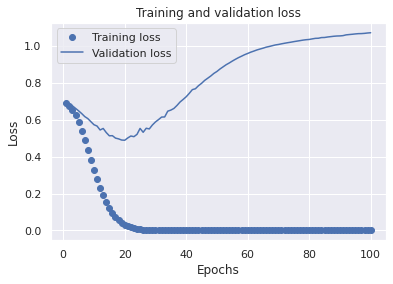

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

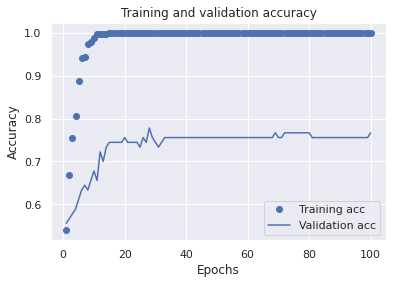

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(train_vecs.toarray(), Y_train, validation_data = (test_vecs.toarray(), Y_test), epochs=10,  batch_size=16)


Epoch 1/10
17/17 [==============================] - 2s 28ms/step - loss: 0.6913 - accuracy: 0.5390 - val_loss: 0.6893 - val_accuracy: 0.5222
Epoch 2/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.5539 - val_loss: 0.6833 - val_accuracy: 0.5333
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.6514 - accuracy: 0.6729 - val_loss: 0.6742 - val_accuracy: 0.5333
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 0.6160 - accuracy: 0.8253 - val_loss: 0.6615 - val_accuracy: 0.5778
Epoch 5/10
17/17 [==============================] - 0s 4ms/step - loss: 0.5719 - accuracy: 0.9368 - val_loss: 0.6461 - val_accuracy: 0.6333
Epoch 6/10
17/17 [==============================] - 0s 4ms/step - loss: 0.5222 - accuracy: 0.9480 - val_loss: 0.6278 - val_accuracy: 0.7333
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.4673 - accuracy: 0.9777 - val_loss: 0.6102 - val_accuracy: 0.7222
Epoch 8/10
17/17 [